# AIML MODULE PROJECT - Meghna

## Unsupervised Learning

---

### Part A

---

#### 1. Data Understanding & Exploration:

In [1]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# A. Read ‘Car name.csv’ as a DataFrame and assign it to a variable.
car_name_df = pd.read_csv('/Users/meghnarana/Downloads/Car name.csv')

# Display the DataFrame
car_name_df.head(5)

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [3]:
# B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable.
with open('/Users/meghnarana/Downloads/Car-Attributes.json') as f:
    car_attributes_data = json.load(f)

car_attributes_df = pd.DataFrame(car_attributes_data)

# Display the DataFrame
car_attributes_df.head(5)

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [4]:
# C. Merge both the DataFrames together to form a single DataFrame.
merged_df = pd.concat([car_name_df, car_attributes_df], axis=1)

# Display the DataFrame
merged_df.head(5)

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [5]:
# D. Print 5 point summary of the numerical features and share insights.
numerical_summary = merged_df.describe()

# Display the summary
numerical_summary

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Insights:

mpg (Miles Per Gallon): The average fuel efficiency is around 23.5 mpg, with a minimum of 9 mpg and a maximum of 46.6 mpg. The distribution appears somewhat positively skewed.

cyl (Number of Cylinders): The average number of cylinders is approximately 5.45, with a minimum of 3 cylinders and a maximum of 8 cylinders.

disp (Displacement): The average displacement is around 193.43 cubic inches, with values ranging from 68 to 455 cubic inches. There is a notable variability in engine displacements.

wt (Weight): The average weight is about 2970.42 lbs, with a minimum of 1613 lbs and a maximum of 5140 lbs. There is a wide range of weights in the dataset.

acc (Acceleration): The average acceleration is approximately 15.57 seconds, with a minimum of 8 seconds and a maximum of 24.8 seconds. The distribution appears to be somewhat right-skewed.

yr (Year of Manufacture): The dataset covers cars manufactured from 1970 to 1982, with an average around 76.01.

origin: The 'origin' column seems to represent the region of origin, with values ranging from 1 to 3.

#### 2. Data Preparation & Analysis:

In [6]:
# A. Check and print feature-wise percentage of missing values and impute with the best suitable approach.
missing_percentage = merged_df.isnull().mean() * 100
print("Feature-wise percentage of missing values:")
print(missing_percentage)

Feature-wise percentage of missing values:
car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64


In [7]:
# B. Check for duplicate values in the data and impute with the best suitable approach.
duplicates = merged_df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


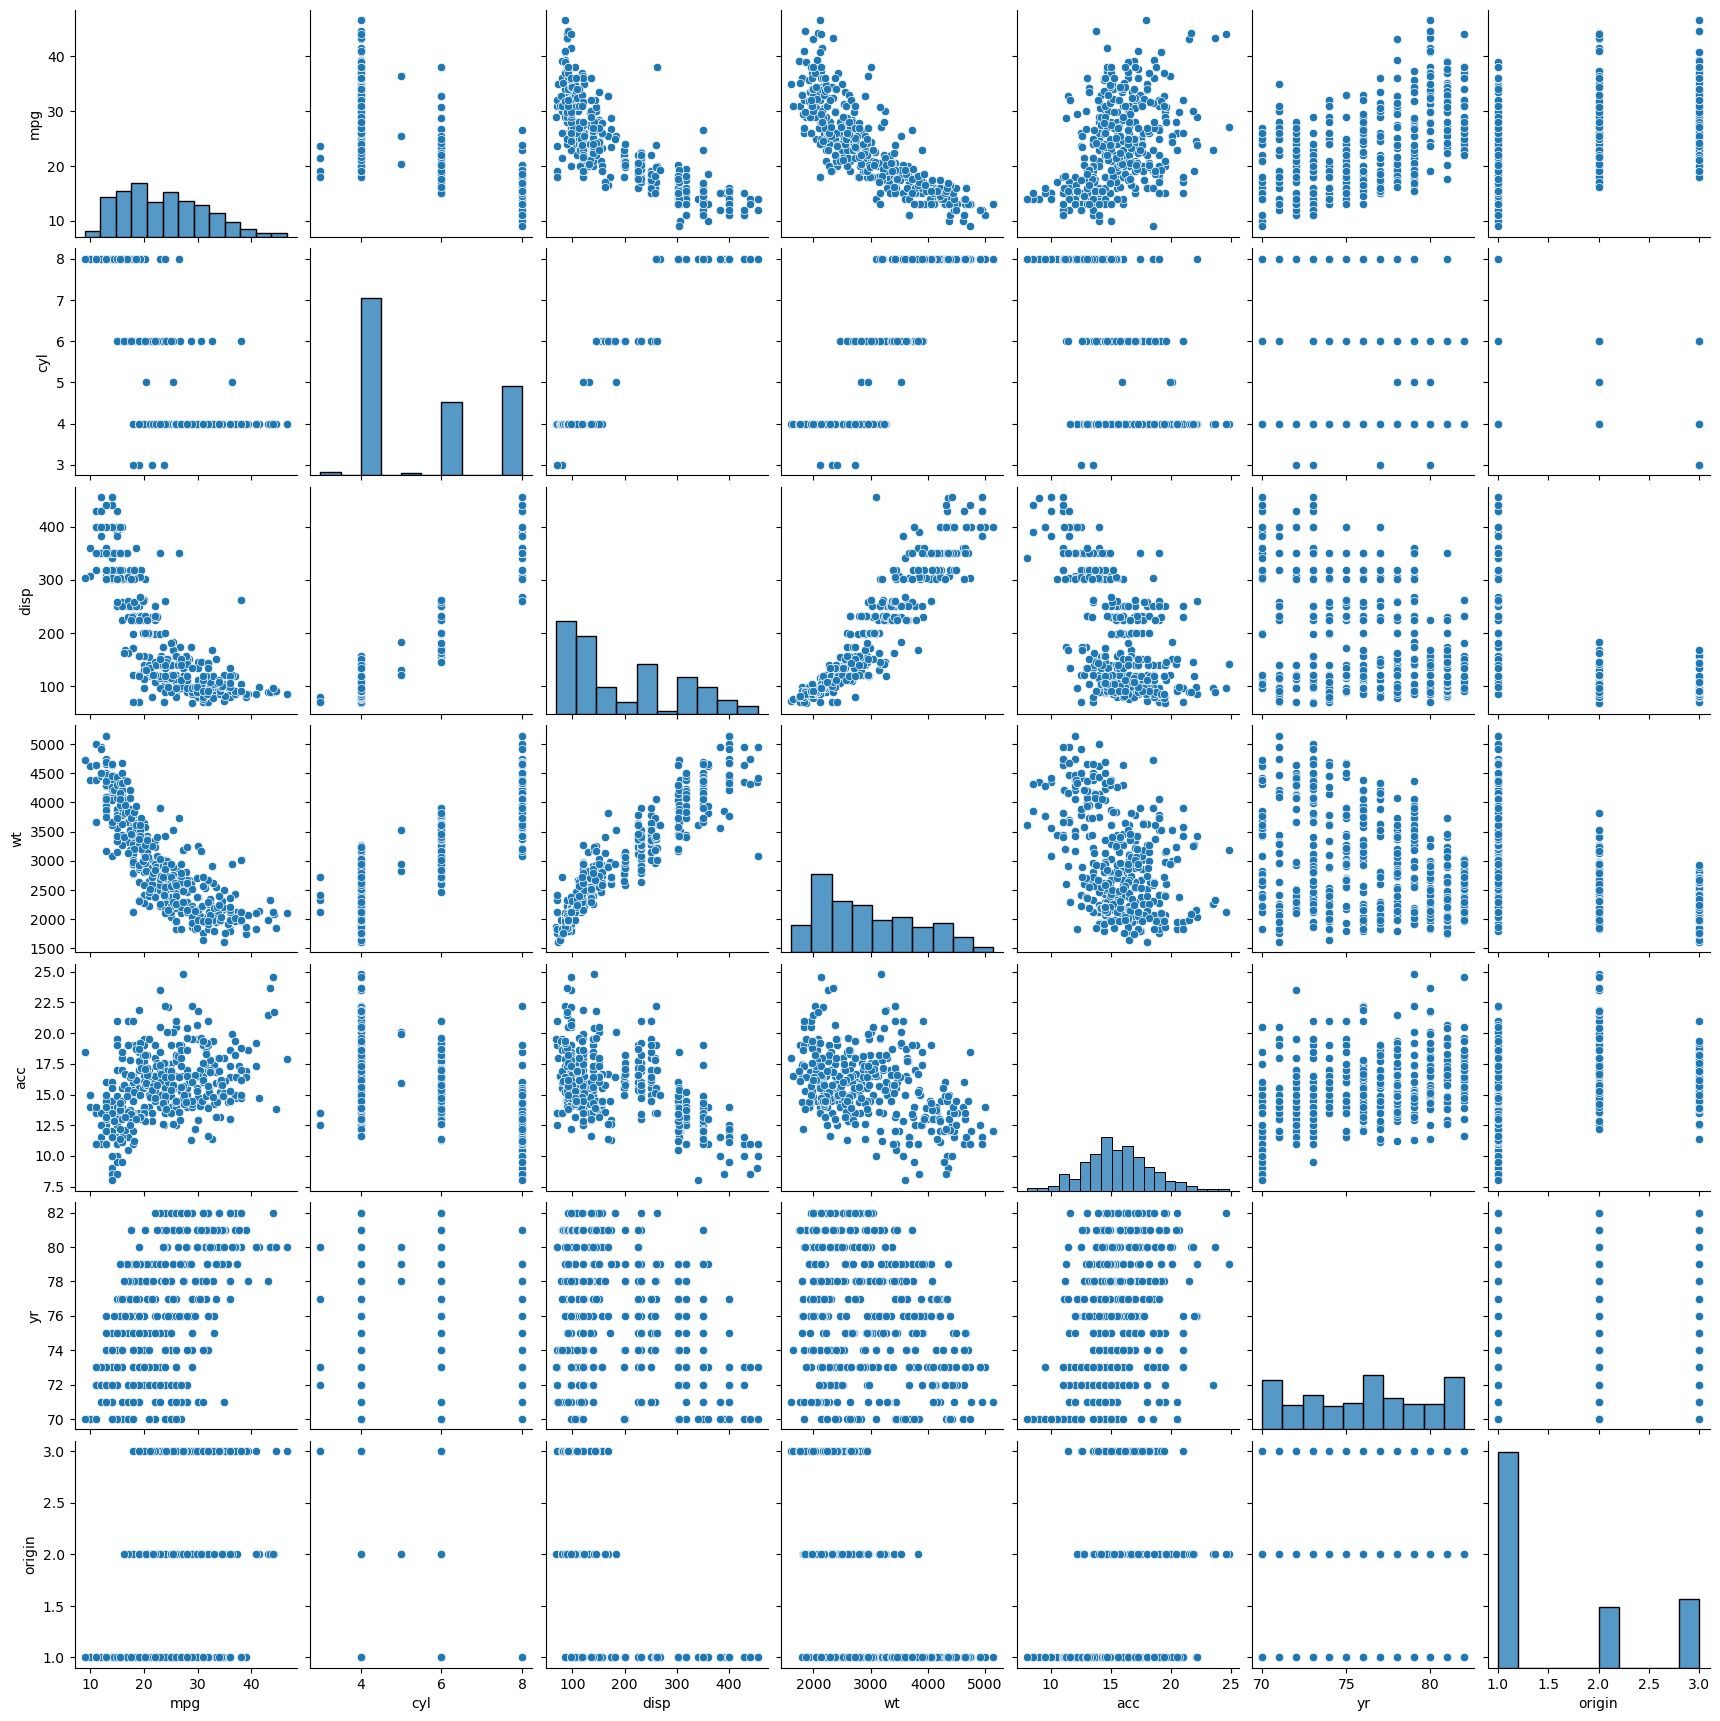

In [8]:
# C. Plot a pairplot for all features.
sns.pairplot(merged_df)
plt.show()

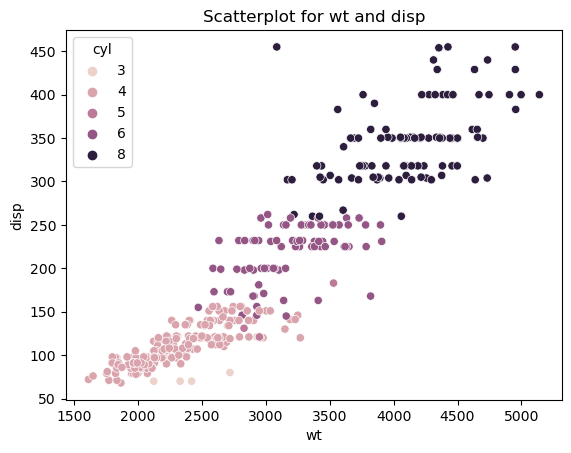

In [9]:
# D. Visualize a scatterplot for 'wt' and 'disp'. Datapoints should be distinguishable by 'cyl'.
sns.scatterplot(x='wt', y='disp', hue='cyl', data=merged_df)
plt.title('Scatterplot for wt and disp')
plt.show()

The scatterplot shows the relationship between 'wt' (weight) and 'disp' (displacement) with different colors for each 'cyl' category.

It helps visualize how weight and displacement vary across different cylinder categories.

1. **Strong Positive Correlation:**
   - The correlation coefficient of 0.93 suggests a strong positive relationship between the weight ('wt') and displacement ('disp'). As the weight of a vehicle increases, its displacement tends to increase.

2. **Weight Distribution:**
   - The weight ('wt') variable has a wide range, from 1613 to 5140, with a mean of 2970.42. This indicates a diverse set of vehicles in terms of weight.

3. **Displacement Distribution:**
   - The displacement ('disp') variable also has a broad range, from 68 to 455, with a mean of 193.43. This suggests variability in the engine displacements among the vehicles.

4. **Cylinder Category Insights:**
   - The count of data points for each cylinder category ('cyl') indicates that 4-cylinder vehicles are the most prevalent in the dataset (204 data points), followed by 8-cylinder (103 data points) and 6-cylinder (84 data points) vehicles.
   - There are only a few data points for 3-cylinder (4 data points) and 5-cylinder (3 data points) vehicles, suggesting that these categories are less common.

5. **Variability Within Cylinder Categories:**
   - Examining the statistics for each cylinder category reveals variations in both weight ('wt') and displacement ('disp') within each group. This suggests that the number of cylinders alone may not fully explain the variability in 'wt' and 'disp'.

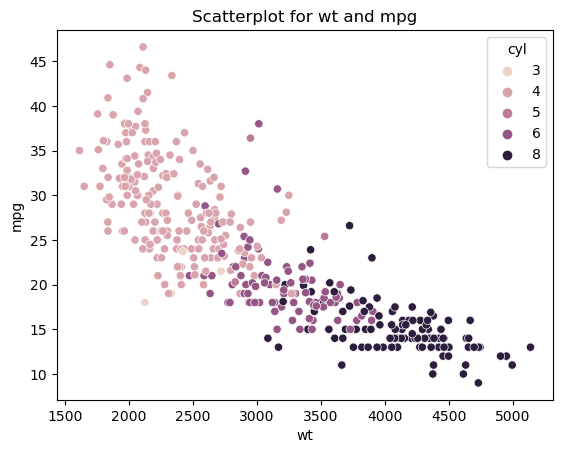

In [10]:
# F. Visualize a scatterplot for 'wt' and 'mpg'. Datapoints should be distinguishable by 'cyl'.
sns.scatterplot(x='wt', y='mpg', hue='cyl', data=merged_df)
plt.title('Scatterplot for wt and mpg')
plt.show()

The scatterplot shows the relationship between 'wt' (weight) and 'mpg' (miles per gallon) with different colors for each 'cyl' category.

It helps visualize how weight and fuel efficiency vary across different cylinder categories.

1. **Correlation Pattern:**
   - There is a clear pattern of strong negative correlation between vehicle weight ('wt') and miles per gallon ('mpg'). As vehicle weight increases, fuel efficiency tends to decrease.

2. **Weight and MPG Dynamics:**
   - The dataset exhibits a diverse range of vehicle weights, suggesting variability in the types of vehicles considered.
   - The miles per gallon distribution across the dataset shows a range of fuel efficiencies, indicating differences in how vehicles of various weights perform in terms of fuel consumption.

3. **Cylinder Category Diversity:**
   - Different cylinder categories ('cyl') contribute to the dataset, with a noticeable dominance of 4-cylinder vehicles. This implies a mix of small and mid-sized cars.

4. **Fuel Efficiency Variations Among Cylinder Categories:**
   - Each cylinder category shows distinct patterns in miles per gallon, contributing to the overall negative correlation. For example, 4-cylinder vehicles tend to have higher average fuel efficiency compared to 8-cylinder vehicles.

5. **Considerations for Analysis:**
   - The insights suggest that when analyzing factors affecting fuel efficiency, it's essential to consider the interplay between vehicle weight and cylinder category.

In [11]:
# H. Check for unexpected values in all the features and datapoints with such values.
# You may use value_counts() or unique() to check for unexpected values in each feature.
for column in merged_df.columns:
    print(f"Unique values in {column}: {merged_df[column].unique()}")

Unique values in car_name: ['chevrolet chevelle malibu' 'buick skylark 320' 'plymouth satellite'
 'amc rebel sst' 'ford torino' 'ford galaxie 500' 'chevrolet impala'
 'plymouth fury iii' 'pontiac catalina' 'amc ambassador dpl'
 'dodge challenger se' "plymouth 'cuda 340" 'chevrolet monte carlo'
 'buick estate wagon (sw)' 'toyota corona mark ii' 'plymouth duster'
 'amc hornet' 'ford maverick' 'datsun pl510'
 'volkswagen 1131 deluxe sedan' 'peugeot 504' 'audi 100 ls' 'saab 99e'
 'bmw 2002' 'amc gremlin' 'ford f250' 'chevy c20' 'dodge d200' 'hi 1200d'
 'chevrolet vega 2300' 'toyota corona' 'ford pinto'
 'plymouth satellite custom' 'ford torino 500' 'amc matador'
 'pontiac catalina brougham' 'dodge monaco (sw)'
 'ford country squire (sw)' 'pontiac safari (sw)'
 'amc hornet sportabout (sw)' 'chevrolet vega (sw)' 'pontiac firebird'
 'ford mustang' 'mercury capri 2000' 'opel 1900' 'peugeot 304' 'fiat 124b'
 'toyota corolla 1200' 'datsun 1200' 'volkswagen model 111'
 'plymouth cricket' 'toyota 

In [12]:
# Assuming 'merged_df' is the merged DataFrame
import pandas as pd

# Identify rows with '?' in 'hp'
rows_with_question_mark = merged_df[merged_df['hp'] == '?']

# Display the rows with unexpected values
print("Rows with '?' in 'hp':")
print(rows_with_question_mark)

# Handle missing values in 'hp'
# Assuming 'hp' is a numerical column, replace '?' with the mean of the column
merged_df['hp'] = pd.to_numeric(merged_df['hp'], errors='coerce')  # Convert to numeric, coerce errors to NaN
merged_df['hp'].fillna(merged_df['hp'].mean(), inplace=True)  # Replace NaN with mean

# Confirm that the missing values have been handled
print("\nAfter handling missing values:")
print(merged_df.info())

Rows with '?' in 'hp':
                 car_name   mpg  cyl   disp hp    wt   acc  yr  origin
32             ford pinto  25.0    4   98.0  ?  2046  19.0  71       1
126         ford maverick  21.0    6  200.0  ?  2875  17.0  74       1
330  renault lecar deluxe  40.9    4   85.0  ?  1835  17.3  80       2
336    ford mustang cobra  23.6    4  140.0  ?  2905  14.3  80       1
354           renault 18i  34.5    4  100.0  ?  2320  15.8  81       2
374        amc concord dl  23.0    4  151.0  ?  3035  20.5  82       1

After handling missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    float64
 5   wt        398 non-null    int64  
 6   acc       398 non-null    f

#### 3. Clustering:

In [13]:
# Extracting relevant features for clustering
features_for_clustering = merged_df[['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin']]

In [14]:
# A. Apply K-Means clustering for 2 to 10 clusters.
inertia_values = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_for_clustering)
    inertia_values.append(kmeans.inertia_)

/Users/meghnarana/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/meghnarana/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/meghnarana/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/meghnarana/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default valu

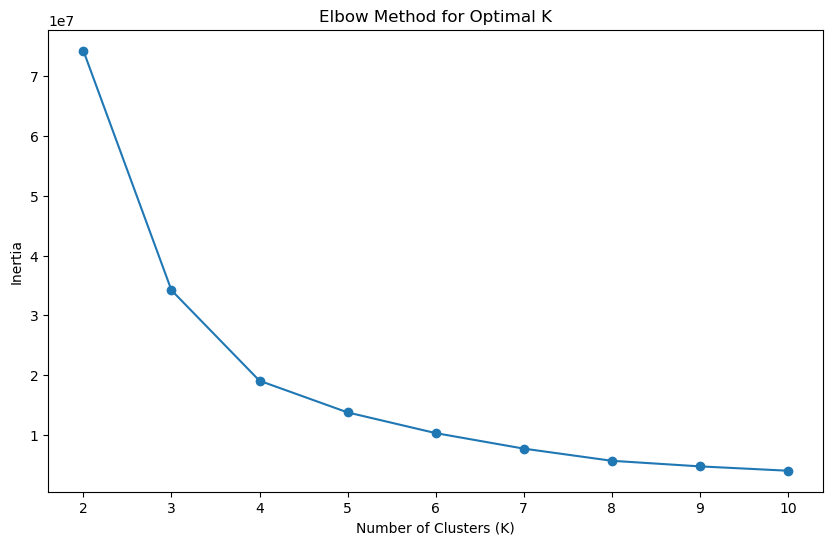

In [15]:
# B. Plot a visual and find elbow point.
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

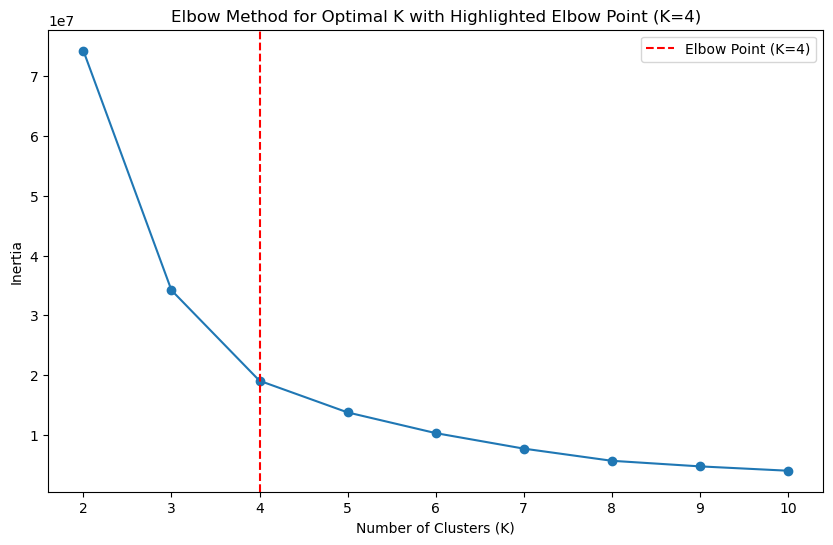

In [16]:
# C. On the above visual, highlight which are the possible Elbow points.
# Visually inspecting the plot, let's assume the elbow point is at K=4.
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal K with Highlighted Elbow Point (K=4)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.axvline(x=4, color='red', linestyle='--', label='Elbow Point (K=4)')
plt.legend()
plt.show()

In [17]:
# D. Train a K-means clustering model once again on the optimal number of clusters.
# Assume the elbow point is at K=4 based on visual inspection
optimal_k = 4
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
merged_df['cluster_label'] = kmeans_optimal.fit_predict(features_for_clustering)

/Users/meghnarana/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [18]:
# E. Add a new feature in the DataFrame which will have labels based upon cluster value.
# Assuming the new column is named 'cluster_label'
merged_df['cluster_label'] = kmeans_optimal.labels_

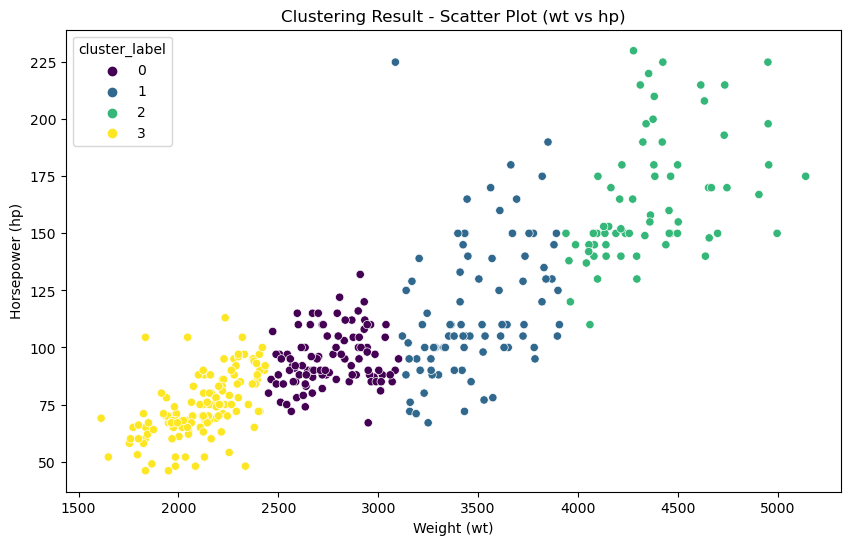

In [19]:
# F. Plot a visual and color the datapoints based upon clusters.
# Choosing 'wt' and 'hp' for the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wt', y='hp', hue='cluster_label', data=merged_df, palette='viridis')
plt.title('Clustering Result - Scatter Plot (wt vs hp)')
plt.xlabel('Weight (wt)')
plt.ylabel('Horsepower (hp)')
plt.show()

In [20]:
# G. Pass a new DataPoint and predict which cluster it belongs to.
# Creating a synthetic new record for demonstration
new_data_point = pd.DataFrame({'mpg': [25], 'cyl': [4], 'disp': [110], 'hp': [90], 'wt': [2600],
                                'acc': [14], 'yr': [81], 'origin': [1]})

# Predicting the cluster for the new data point
predicted_cluster = kmeans_optimal.predict(new_data_point)
print(f'The new datapoint belongs to Cluster {predicted_cluster[0]}')

The new datapoint belongs to Cluster 0


---

### Part B

---

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
import numpy as np

#### Data Understanding & Cleaning

In [22]:
# A. Read 'vehicle.csv' and save as DataFrame:
df = pd.read_csv('/Users/meghnarana/Downloads/vehicle.csv')

In [23]:
# B. Check percentage of missing values and impute with the correct approach:
missing_percentage = df.isnull().mean() * 100
print("Missing Values:")
print(missing_percentage[missing_percentage > 0])

Missing Values:
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
dtype: float64


In [24]:
# Separate numerical and categorical columns
numeric_columns = df.select_dtypes(include='number').columns
categorical_columns = df.select_dtypes(exclude='number').columns

# Impute missing values in numerical columns with the mean
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Impute missing values in categorical columns with the mode
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

missing_percentage_imputed = df.isnull().mean() * 100
print("Missing Values after Impute:")
print(missing_percentage_imputed[missing_percentage_imputed > 0])

Missing Values after Impute:
Series([], dtype: float64)


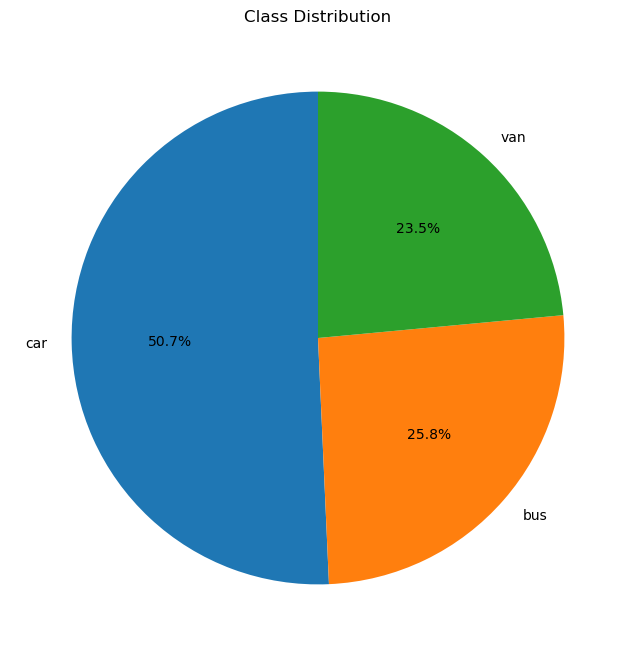

Percentage of Values for 'class':
class
car    50.709220
bus    25.768322
van    23.522459
Name: proportion, dtype: float64


In [25]:
# C. Visualize a Pie-chart and print the percentage of values for the variable 'class':
# Convert 'class' to categorical type
df['class'] = df['class'].astype('category')

class_distribution = df['class'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution')
plt.show()

print("Percentage of Values for 'class':")
print(df['class'].value_counts(normalize=True) * 100)

In [26]:
# D. Check for duplicate rows in the data and impute with the correct approach:
duplicate_rows = df[df.duplicated()]

# Print the number of duplicate rows
print("Number of Duplicate Rows:", len(duplicate_rows))

Number of Duplicate Rows: 0


#### Data Preparation

In [27]:
# A. Split data into X and Y
X = df.drop(columns=['class'])  # Assuming 'class' is the target variable
Y = df['class']

In [28]:
# B. Standardize the Data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

#### Model Building

In [29]:
# A. Train a base Classification model using SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_standardized, Y)

SVC(random_state=42)

In [30]:
# B. Print Classification metrics for train data
Y_pred = svm_model.predict(X_standardized)
print("Classification Metrics for Train Data:")
print(classification_report(Y, Y_pred))
print("Accuracy:", accuracy_score(Y, Y_pred))

Classification Metrics for Train Data:
              precision    recall  f1-score   support

         bus       0.99      0.98      0.98       218
         car       0.99      0.98      0.99       429
         van       0.95      0.98      0.97       199

    accuracy                           0.98       846
   macro avg       0.98      0.98      0.98       846
weighted avg       0.98      0.98      0.98       846

Accuracy: 0.9810874704491725


In [31]:
# C. Apply PCA on the data with 10 components
pca_10 = PCA(n_components=10)
X_pca_10 = pca_10.fit_transform(X_standardized)

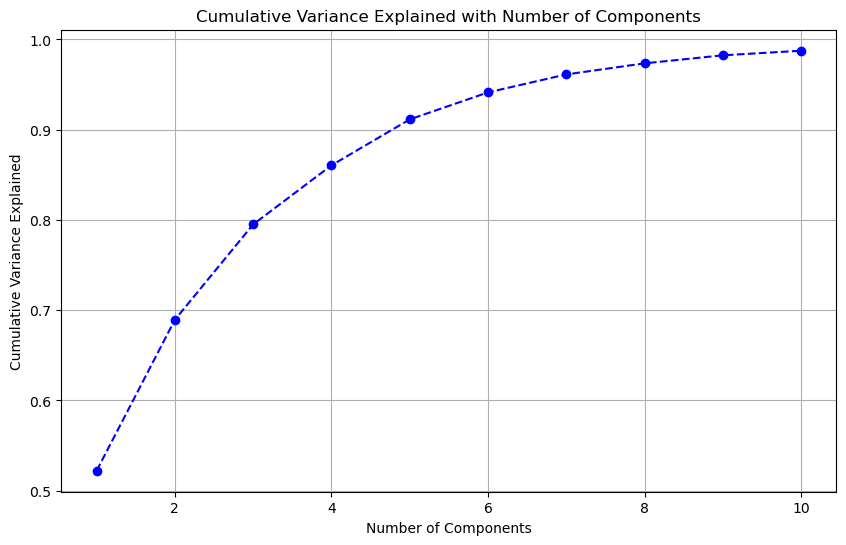

In [32]:
# D. Visualize Cumulative Variance Explained with Number of Components
cumulative_variance_ratio = np.cumsum(pca_10.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), cumulative_variance_ratio, marker='o', linestyle='--', color='b')
plt.title('Cumulative Variance Explained with Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()

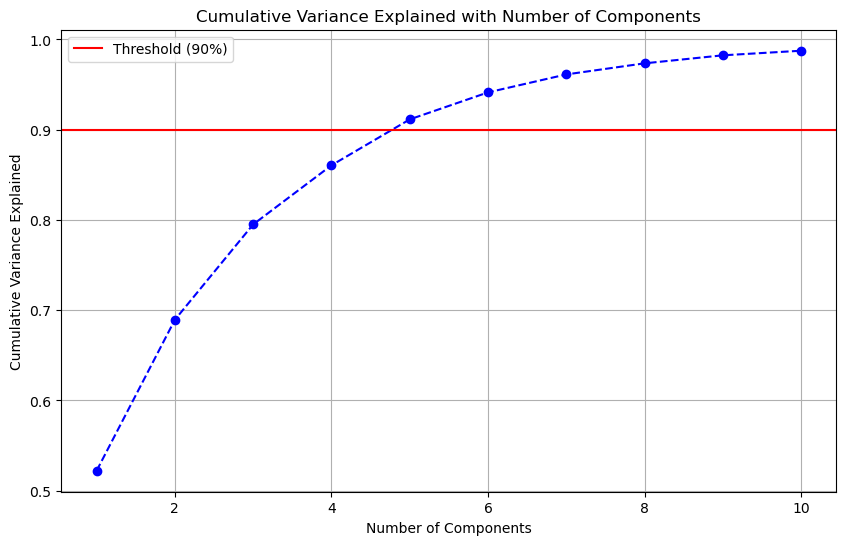

In [33]:
# E. Draw a horizontal line on the above plot to highlight the threshold of 90%
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), cumulative_variance_ratio, marker='o', linestyle='--', color='b')
plt.axhline(y=0.9, color='r', linestyle='-', label='Threshold (90%)')
plt.title('Cumulative Variance Explained with Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
# F. Apply PCA on the data. Select Minimum Components with 90% or above variance explained
n_components_90 = np.argmax(cumulative_variance_ratio >= 0.9) + 1
pca_90 = PCA(n_components=n_components_90)
X_pca_90 = pca_90.fit_transform(X_standardized)

In [35]:
# G. Train SVM model on components selected from above step
svm_model_pca = SVC(random_state=42)
svm_model_pca.fit(X_pca_90, Y)

SVC(random_state=42)

In [36]:
# H. Print Classification metrics for train data of above model and share insights
Y_pred_pca = svm_model_pca.predict(X_pca_90)
print("Classification Metrics for Train Data (PCA):")
print(classification_report(Y, Y_pred_pca))
print("Accuracy (PCA):", accuracy_score(Y, Y_pred_pca))

Classification Metrics for Train Data (PCA):
              precision    recall  f1-score   support

         bus       0.85      0.68      0.76       218
         car       0.84      0.89      0.87       429
         van       0.70      0.76      0.73       199

    accuracy                           0.81       846
   macro avg       0.80      0.78      0.78       846
weighted avg       0.81      0.81      0.80       846

Accuracy (PCA): 0.806146572104019


#### Performance Improvement:

In [37]:
# A. Train another SVM on the components out of PCA. Tune the parameters to improve performance
param_grid = {'C': [1, 10], 'gamma': [0.1, 1], 'kernel': ['rbf']}
svm_model_tuned = SVC(random_state=42)
grid_search = GridSearchCV(svm_model_tuned, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_pca_90, Y)

GridSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [1, 10], 'gamma': [0.1, 1], 'kernel': ['rbf']},
             scoring='accuracy')

In [38]:
# B. Share best Parameters observed from above step
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [39]:
# C. Print Classification metrics for train data of above model and share relative improvement in performance
Y_pred_tuned = grid_search.predict(X_pca_90)
print("Classification Metrics for Train Data (Tuned SVM):")
print(classification_report(Y, Y_pred_tuned))
print("Accuracy (Tuned SVM):", accuracy_score(Y, Y_pred_tuned))

# Compare with previous models
print("\nRelative Improvement in Performance:")
print("Base SVM Accuracy:", accuracy_score(Y, Y_pred))
print("SVM with PCA Accuracy:", accuracy_score(Y, Y_pred_pca))
print("Tuned SVM with PCA Accuracy:", accuracy_score(Y, Y_pred_tuned))

Classification Metrics for Train Data (Tuned SVM):
              precision    recall  f1-score   support

         bus       0.87      0.86      0.86       218
         car       0.91      0.93      0.92       429
         van       0.85      0.82      0.84       199

    accuracy                           0.89       846
   macro avg       0.88      0.87      0.87       846
weighted avg       0.89      0.89      0.89       846

Accuracy (Tuned SVM): 0.8877068557919622

Relative Improvement in Performance:
Base SVM Accuracy: 0.9810874704491725
SVM with PCA Accuracy: 0.806146572104019
Tuned SVM with PCA Accuracy: 0.8877068557919622


#### Data Understanding & Cleaning

A. **Prerequisites/Assumptions of PCA (Principal Component Analysis):**

1. **Linearity:** PCA assumes that the relationships among variables are linear. If the relationships are highly nonlinear, PCA may not perform optimally.

2. **Scale Consistency:** Variables should be on a similar scale for PCA to give meaningful results. Standardizing or normalizing variables is a common preprocessing step before applying PCA.

3. **Mean-Centered Data:** PCA is sensitive to the mean of the data. Therefore, it is recommended to center the data by subtracting the mean from each variable.

4. **Homoscedasticity:** Homoscedasticity implies that the variance of the data is roughly constant across all levels of the variables. PCA can be influenced by variables with high variance.

5. **Large Sample Size:** PCA tends to perform better with a larger sample size. Small sample sizes may not provide reliable estimates of the covariance matrix.

B. **Advantages and Limitations of PCA:**

**Advantages:**

1. **Dimensionality Reduction:** PCA reduces the dimensionality of the data by transforming it into a new set of uncorrelated variables (principal components) that capture most of the variance in the original data.

2. **Feature Independence:** Principal components are orthogonal (uncorrelated), leading to a set of features that are independent of each other. This simplifies the interpretation of the data.

3. **Noise Reduction:** PCA can help in reducing the impact of noise in the data by focusing on the principal components that capture the underlying patterns.

4. **Data Visualization:** PCA facilitates data visualization by representing high-dimensional data in a lower-dimensional space, making it easier to explore and understand.

5. **Multicollinearity Handling:** PCA is effective in handling multicollinearity, which occurs when variables in the dataset are highly correlated.

**Limitations:**

1. **Linearity Assumption:** PCA assumes that relationships among variables are linear. If the underlying relationships are nonlinear, PCA may not accurately capture the structure of the data.

2. **Interpretability:** While PCA provides a set of uncorrelated variables, the interpretability of these components may be challenging, especially if the original variables have complex, real-world meanings.

3. **Variance Focus:** PCA focuses on maximizing variance and may not capture the most informative variables for certain tasks, especially if other criteria, such as class separability, are more important.

4. **Sensitive to Outliers:** PCA is sensitive to outliers in the data, and extreme values can heavily influence the principal components.

5. **Assumes Gaussian Distribution:** PCA assumes that the data follows a Gaussian distribution. If the data is not normally distributed, the results may be suboptimal.

In summary, while PCA offers powerful tools for dimensionality reduction and data exploration, users should be mindful of its assumptions and limitations, and consider alternative methods based on the specific characteristics of their data.

---